# "BSN"

In [71]:
from IPython.display import IFrame
IFrame('https://app.powerbi.com/view?r=eyJrIjoiMjQxMTRmYzUtNTgzOS00MjM4LTg2MmMtMTNhMWVhZDMyNGExIiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9&embedImagePlaceholder=true&pageName=ReportSection', width=600, height=373.5)


In [72]:
IFrame('https://app.powerbi.com/view?r=eyJrIjoiYzdlMjVhMWEtY2ZhZC00ZGMxLWE3N2EtY2RlNDg3M2FlMDkzIiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9&embedImagePlaceholder=true&pageName=ReportSection', width=600, height=373.5)


In [73]:

from IPython.display import IFrame
IFrame('https://app.powerbi.com/view?r=eyJrIjoiNjlhNzAyNjgtNmNmNC00M2ZhLWE5M2YtNDA2ZmRhNzYxZTk3IiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9', width=600, height=373.5)


In [74]:
import pandas as pd
import numpy as np
import os 
import csv

# Load the data
away = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/away.csv')
home = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/home.csv')
boxscore = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/boxscore.csv')



print("Number of rows & cols in 'AWAY' DataFrame:", away.shape)
print("Number of rows & cols in 'HOME' DataFrame:", home.shape)
print("Number of rows & cols in 'BOXSCORE' DataFrame:", boxscore.shape)

away.dropna(inplace=True)
home.dropna(inplace=True)
boxscore.dropna(inplace=True)
print("-------------------------------------------------------------")
print("Number of rows & cols in 'AWAY' Dataframe after droppin NaN:", away.shape)
print("Number of rows & cols in 'HOME' Dataframe after droppin NaN:", home.shape)
print("Number of rows & cols in 'BOXSCORE' Dataframe after droppin NaN:", boxscore.shape)

Number of rows & cols in 'AWAY' DataFrame: (27877, 27)
Number of rows & cols in 'HOME' DataFrame: (27665, 27)
Number of rows & cols in 'BOXSCORE' DataFrame: (4830, 13)
-------------------------------------------------------------
Number of rows & cols in 'AWAY' Dataframe after droppin NaN: (23047, 27)
Number of rows & cols in 'HOME' Dataframe after droppin NaN: (22835, 27)
Number of rows & cols in 'BOXSCORE' Dataframe after droppin NaN: (4470, 13)


Now, let's check the number of rows and columns in the away DataFrame:

In [75]:
print("First few rows of 'away' DataFrame:")
boxscore


First few rows of 'away' DataFrame:


,gameid_,Source,Team,Total,1Q,2Q,3Q,4Q,fecha.Source.Name.1,fecha.Source.Name.2,fecha.Day,fecha.Time,fecha.AM:PM
360,20081005,boxscore.csv,Caguas,80.0,19.0,20.0,18.0,23.0,20081005,fecha.csv,2008-05-20 00:00:00.000,1899-12-30 08:00:00.000,PM
361,20081007,boxscore.csv,Caguas,74.0,13.0,15.0,26.0,20.0,20081007,fecha.csv,2008-05-21 00:00:00.000,1899-12-30 08:00:00.000,PM
362,20081009,boxscore.csv,Caguas,87.0,27.0,24.0,14.0,22.0,20081009,fecha.csv,2008-05-23 00:00:00.000,1899-12-30 08:00:00.000,PM
363,20081014,boxscore.csv,Caguas,81.0,21.0,22.0,21.0,17.0,20081014,fecha.csv,2008-05-26 00:00:00.000,1899-12-30 08:00:00.000,PM
364,20081018,boxscore.csv,Caguas,83.0,21.0,18.0,27.0,17.0,20081018,fecha.csv,2008-05-28 00:00:00.000,1899-12-30 08:00:00.000,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,20211180,boxscore.csv,Mayaguez,87.0,30.0,21.0,18.0,18.0,20211180,fecha.csv,2021-10-02 00:00:00.000,1899-12-30 09:00:00.000,PM
4826,20221051,boxscore.csv,Bayamon,89.0,20.0,31.0,27.0,11.0,20221051,fecha.csv,2022-05-08 00:00:00.000,1899-12-30 06:00:00.000,PM
4827,20221051,boxscore.csv,Santurce,95.0,27.0,18.0,24.0,26.0,20221051,fecha.csv,2022-05-08 00:00:00.000,1899-12-30 06:00:00.000,PM
4828,20221102,boxscore.csv,Fajardo,79.0,20.0,20.0,22.0,17.0,20221102,fecha.csv,2022-06-05 00:00:00.000,1899-12-30 06:00:00.000,PM


# "What are the correlations between team statistics and winning percentages?"

To answer this question, I first need to calculate the winning percentage for each team in each game. By comparing the total points scored by each team and determining which team scored more points. If a team scored more points, we assign them a winning percentage of 1. If a team scored fewer points, we assign them a winning percentage of 0. If both teams scored the same number of points, we assign each team a winning percentage of 0.5.

Once we have the winning percentage for each team in each game, we can calculate the correlation between the winning percentage and each team statistic. 


In [76]:
# Merge the away and home dataframes
games = pd.merge(away, home, on='gameid_', suffixes=('_away', '_home'))

# Merge the boxscore dataframe
games = pd.merge(games, boxscore, on='gameid_')

# Separate th
# Calculate winning percentage for each team in each game
games['away_win'] = np.where(games['PTS_away'] > games['PTS_home'], 1, 0)
games['home_win'] = np.where(games['PTS_home'] > games['PTS_away'], 1, 0)
games['winning_percentage_away'] = games['away_win'] / (games['away_win'] + games['home_win'])
games['winning_percentage_home'] = games['home_win'] / (games['away_win'] + games['home_win'])

# Calculate correlations between winning percentage and team statistics
correlations_away = games.drop(['fecha.Source.Name.1', 'fecha.Time', 'fecha.AM:PM'], axis=1).corrwith(games['winning_percentage_away'])
correlations_home = games.drop(['fecha.Source.Name.1', 'fecha.Time', 'fecha.AM:PM'], axis=1).corrwith(games['winning_percentage_home'])

# Print correlations
print('Correlations with winning percentage for away team:')
print(correlations_away)
print()
print('Correlations with winning percentage for home team:')
print(type(correlations_home))
print('This is games.columns')


Correlations with winning percentage for away team:
gameid_                     0.000604
M_away                      0.486268
A_away                      0.476774
FG%_away                    0.345094
M_1_away                    0.356865
A_2_away                    0.351417
3P%_away                    0.285643
M_3_away                    0.374252
A_4_away                    0.377830
FT%_away                    0.371408
O_away                      0.235254
D_away                      0.337083
T_away                      0.349900
AS_away                     0.254547
PF_away                     0.243147
TO_away                     0.264751
ST_away                     0.216755
BS_away                     0.131479
PTS_away                    0.593247
fecha.Source.Name.1_away    0.000604
M_home                     -0.473908
A_home                     -0.462611
FG%_home                   -0.331054
M_1_home                   -0.343198
A_2_home                   -0.334639
3P%_home               

To start, we can use the describe() method to compute summary statistics for each variable in our dataset:

In [77]:
corr_away = games.drop([ 'fecha.Source.Name.1', 'fecha.Time', 'fecha.AM:PM',], axis=1).corr()
corr_home = games.drop([ 'fecha.Source.Name.1', 'fecha.Time', 'fecha.AM:PM',], axis=1).corr()


In [78]:

#games.rename(columns={'old_name': 'new_name'}, inplace=True)
games.rename(columns={'M_away': '2ptsM_away',
                      'A_away': '2ptsA_away',
                      'M_1_away':'3ptsM_away',
                      'A_2_away': '3ptsA_away',
                      'M_3_away': 'FTM_away',
                      'A_4_away': 'FTA_away',
                      'M_home': '2ptsM_home',
                      'A_home': '2ptsA_home',
                      'M_1_home': '3ptsM_home',
                      'A_2_home': '3ptsA_home',
                      'M_3_home': 'FTM_home',
                      'A_4_home': 'FTA_home'}, inplace=True)
print(games.describe())
#games.columns

            gameid_     2ptsM_away     2ptsA_away       FG%_away  \
count  4.750360e+05  475036.000000  475036.000000  475036.000000   
mean   2.015719e+07       2.250171       4.331798       0.414804   
std    4.051591e+04       2.406209       3.979359       0.334068   
min    2.008100e+07       0.000000       0.000000       0.000000   
25%    2.013101e+07       0.000000       1.000000       0.000000   
50%    2.016100e+07       2.000000       3.000000       0.450000   
75%    2.019105e+07       4.000000       7.000000       0.670000   
max    2.023121e+07      17.000000      26.000000       1.000000   

          3ptsM_away     3ptsA_away       3P%_away       FTM_away  \
count  475036.000000  475036.000000  475036.000000  475036.000000   
mean        0.802066       2.233464       0.210025       1.401603   
std         1.230163       2.509309       0.296117       2.048591   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

## Describe() results

This table is showing:
 - **count**: The total number of values.

 - **mean**: This is the average value for that set of numbers.

 - **standard deviation**: Measures how spread out the values are. A small number here indicates that thevalues are close to the mean,while a large number is more spread out. 

 - **minimum**: The smallest value in a set.

 - **25th percentile**: The first quartile, is a value that divides the data into four equal parts, where 25% of the values are less than or equal to the 25th percentile. 

 - **median**: The second quartile, is the value that divides the data into two equal parts, where 50% of the values are less than or equal to the median. 

 - **75th percentile**: The third quartile, is a value that divides the data into four equal parts, where 75% of the values are less than or equal to the 75th percentile. 
 
 - **maximum values**: is the highest value in the dataset
 for each numeric variable in our dataset.

To visualize the distribution of each variable, we can use histograms for numeric variables and bar charts for categorical variables. For example, we can create a histogram of the PTS_away variable using the hist() method:

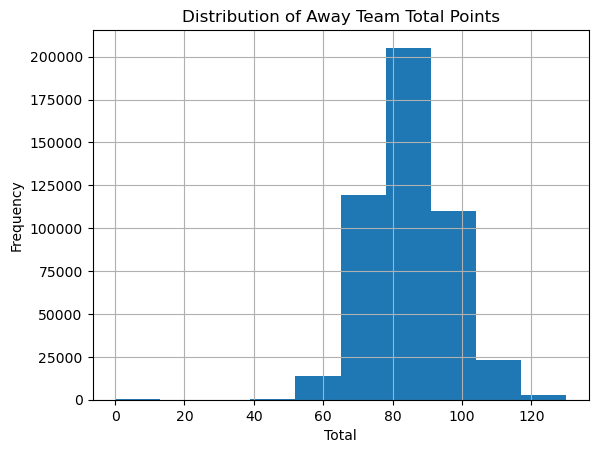

In [79]:
import matplotlib.pyplot as plt

games['Total'].hist()
plt.title('Distribution of Away Team Total Points')
plt.xlabel('Total')
plt.ylabel('Frequency')

plt.show()





To compute correlations between each pair of variables and visualize them using a heatmap, we can use the corr() method and the heatmap() function from the Seaborn library:

In [80]:
ch = correlations_home.to_frame()
ch

,0
gameid_,-0.000604
M_away,-0.486268
A_away,-0.476774
FG%_away,-0.345094
M_1_away,-0.356865
A_2_away,-0.351417
3P%_away,-0.285643
M_3_away,-0.374252
A_4_away,-0.377830
FT%_away,-0.371408


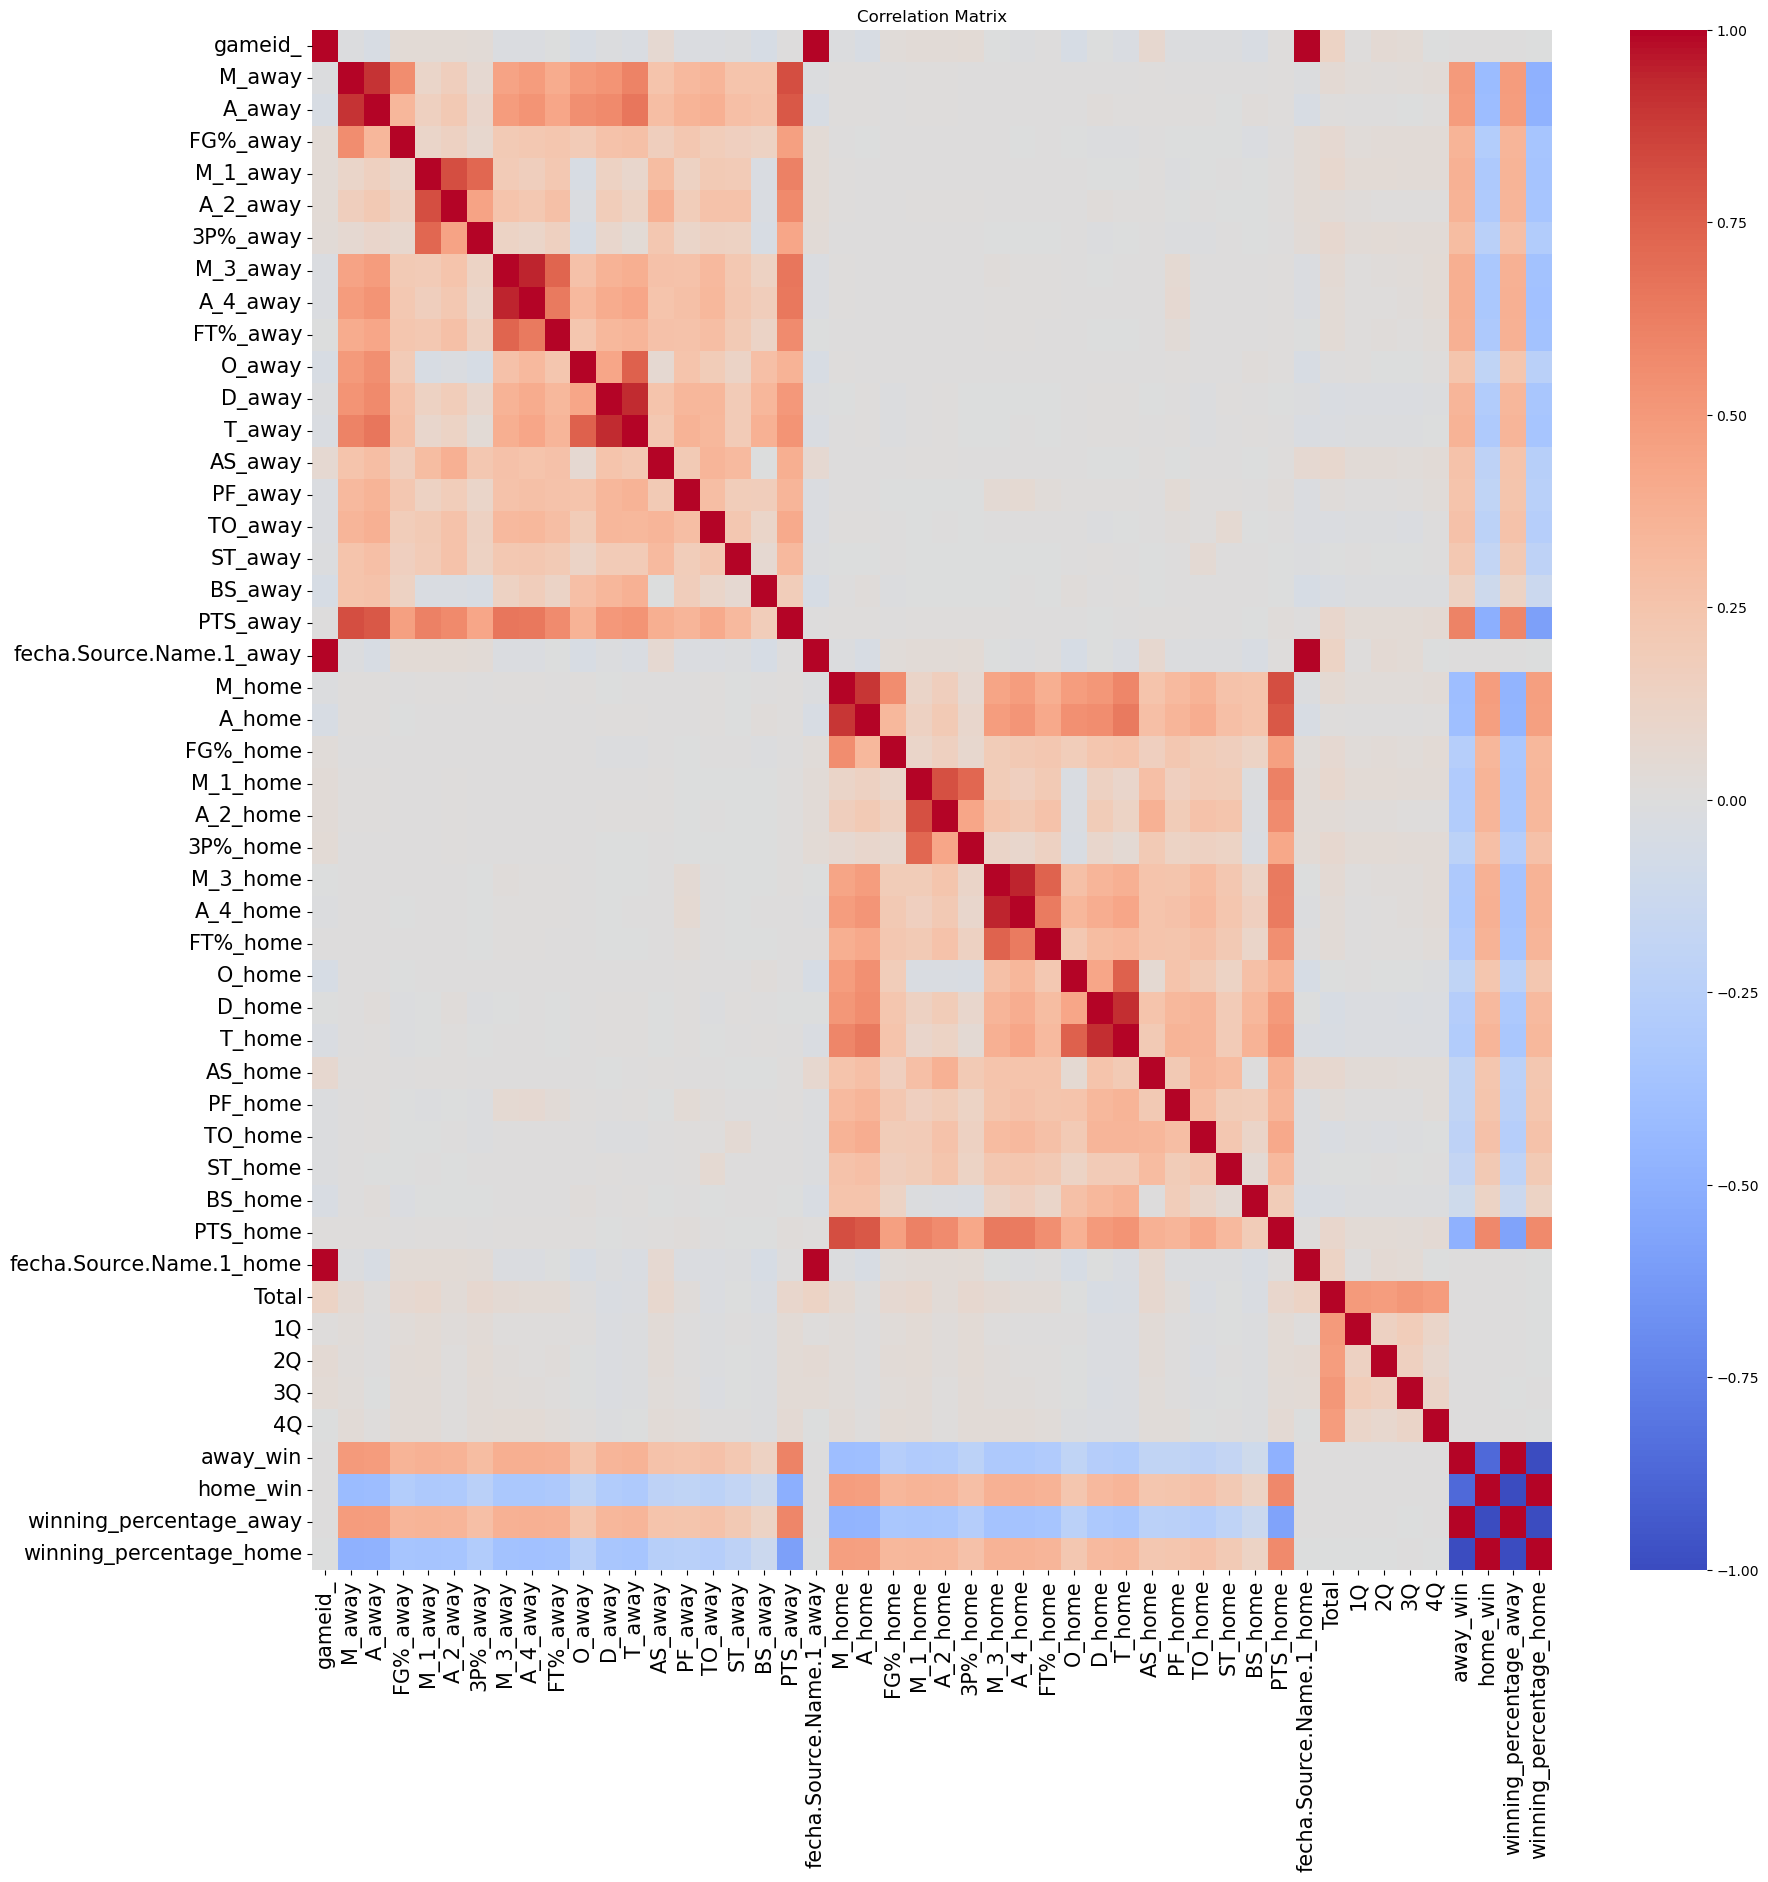

In [81]:
import seaborn as sns
fig, g = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr_home, annot=False, cmap='coolwarm')
 #sns.clustermap(data=corr_s, annot=True, fmt='d',cmap = "Blues")
g.set_xticklabels(g.get_xticklabels(), fontsize = 15)
g.set_yticklabels(g.get_yticklabels(), fontsize = 15)
plt.title('Correlation Matrix')
#plt.x
plt.show()


This will output a heatmap showing the correlation between each pair of variables in our dataset. The darker the color, the stronger the correlation. We can also use the annot=True parameter to show the correlation coefficients in each cell of the heatmap.

After computing the correlations, we can identify the variables that are highly correlated with winning percentages by looking for variables with a high absolute correlation coefficient. We can also visualize the correlations between the winning percentage and other variables using a scatter plot. For example, we can create a scatter plot of the PTS_away variable against the winning_percentage_away variable using the scatter() method:

/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_21821/2837838721.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), fontsize = 15)
/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_21821/2837838721.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticklabels(), fontsize = 15)


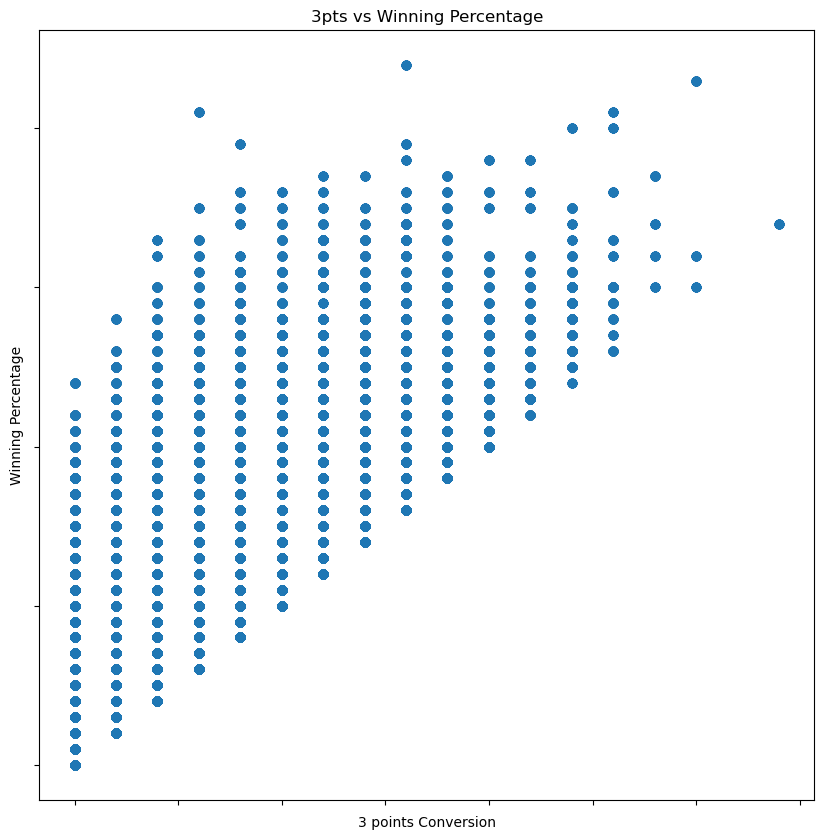

In [82]:
fig, b = plt.subplots(figsize=(10,10)) 


plt.scatter(games['2ptsM_away'], games['PTS_away'])
b.set_xticklabels(b.get_xticklabels(), fontsize = 15)
b.set_yticklabels(b.get_yticklabels(), fontsize = 15)
plt.title('3pts vs Winning Percentage')
plt.xlabel('3 points Conversion')
plt.ylabel('Winning Percentage')
plt.show()



This is a scatter plot showing the relationship between the 3pts Made and missed and the winning_percentage_away variable.

 In the case of our basketball dataset, we need create a new variable by calculating the difference in points between the home team and the away team. This variable may be a strong predictor of winning percentage, as teams that score more points than their opponents are more likely to win.

To create this new variable, we can subtract the 'PTS_away' column from the 'PTS_home' column:

In [84]:
games['point_diff'] = games['PTS_home'] - games['PTS_away']


## **Distribution of Point Differential and Mean**
- In the first plot, the red dashed line represents the mean of the point differential, which is -0.60. This means that, on average, the home team loses by 0.60 points.


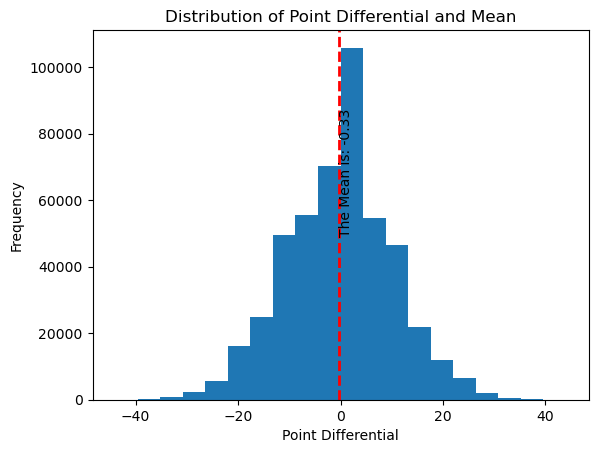

In [89]:
import matplotlib.pyplot as plt

# Create histogram of point_diff
plt.hist(games['point_diff'], bins=20)

# Add a vertical line at the mean of point_diff
plt.axvline(games['point_diff'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(games['point_diff'].mean(), 50000, f'The Mean is: {games["point_diff"].mean():.2f}', rotation=90)

# Add labels and title
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differential and Mean')
plt.show()

## **Distribution of Point Differential and Standard Deviation**
- In this plot, the red dashed line represents the standard deviation of the point differential, which is -0.33. This means that the point differential in the games is quite close, with most values falling within plus or minus -0.33 points from the mean.

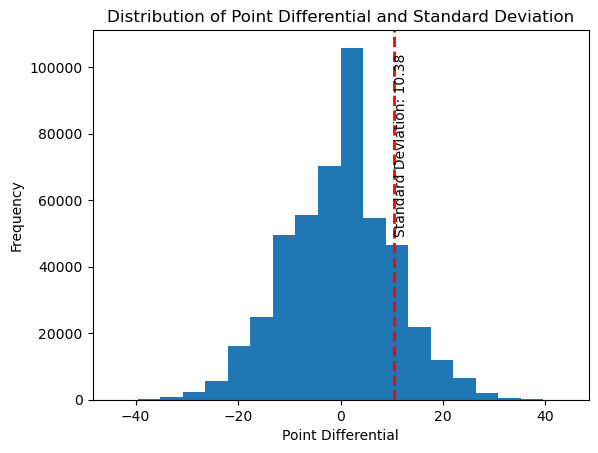

In [90]:
import matplotlib.pyplot as plt

# Create histogram of point_diff
plt.hist(games['point_diff'], bins=20)

# Add a vertical line at the mean of point_diff
plt.axvline(games['point_diff'].std(), color='red', linestyle='dashed', linewidth=2)
plt.text(games['point_diff'].std(), 50000, f'Standard Deviation: {games["point_diff"].std():.2f}', rotation=90)

# Add labels and title
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differential and Standard Deviation')
plt.show()


In [116]:
# Create target variable
games['result'] = games['home_win'].astype(int)

# Select features
features = ['PTS_away', 'PTS_home', 'point_diff', 'gameid_']
X = games[features]
y = games['result']


Next, we can split the dataset into training and testing sets using the train_test_split function from scikit-learn. 

We'll use a 70-30 split, meaning 70% of the data will be used for training and 30% will be used for testing.

Here's the code to split the dataset:

In [117]:
X


,PTS_away,PTS_home,point_diff,gameid_
0,0.0,0.0,0.0,20081003
1,0.0,0.0,0.0,20081003
2,0.0,0.0,0.0,20081003
3,0.0,0.0,0.0,20081003
4,0.0,2.0,2.0,20081003
...,...,...,...,...
475031,3.0,24.0,21.0,20101055
475032,3.0,9.0,6.0,20101055
475033,3.0,9.0,6.0,20101055
475034,3.0,3.0,0.0,20101055


In [118]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Now that we have split our data into training and testing sets, we can move on to building and evaluating our classification tree model. We will be using scikit-learn, a popular machine learning library in Python, to build our model.

Here is an example code to build a decision tree classifier:

In [122]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model using the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In this example, we create a DecisionTreeClassifier object and specify the maximum depth of the tree to be 3. We then train the model using the training set by calling the fit method and passing in the training features (X_train) and labels (y_train). Finally, we use the trained model to make predictions on the testing set by calling the predict method and passing in the testing features (X_test). The predicted labels are stored in the variable y_pred.

We can then evaluate the performance of our model using metrics such as accuracy, precision, recall, and F1 score. Here's an example code to calculate these metrics:

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In this example, we import the accuracy_score, precision_score, recall_score, and f1_score functions from scikit-learn's metrics module. We then calculate each metric by passing in the true labels (y_test) and predicted labels (y_pred) as arguments. Finally, we print out the metrics.

These metrics can give us a good idea of how well our model is performing. For example, accuracy tells us the proportion of correctly classified samples, precision tells us the proportion of true positives among the predicted positives, recall tells us the proportion of true positives among the actual positives, and F1 score is a weighted average of precision and recall that takes both into account.

We can also visualize our decision tree using the plot_tree function from scikit-learn. Here's an example code to plot the decision tree:

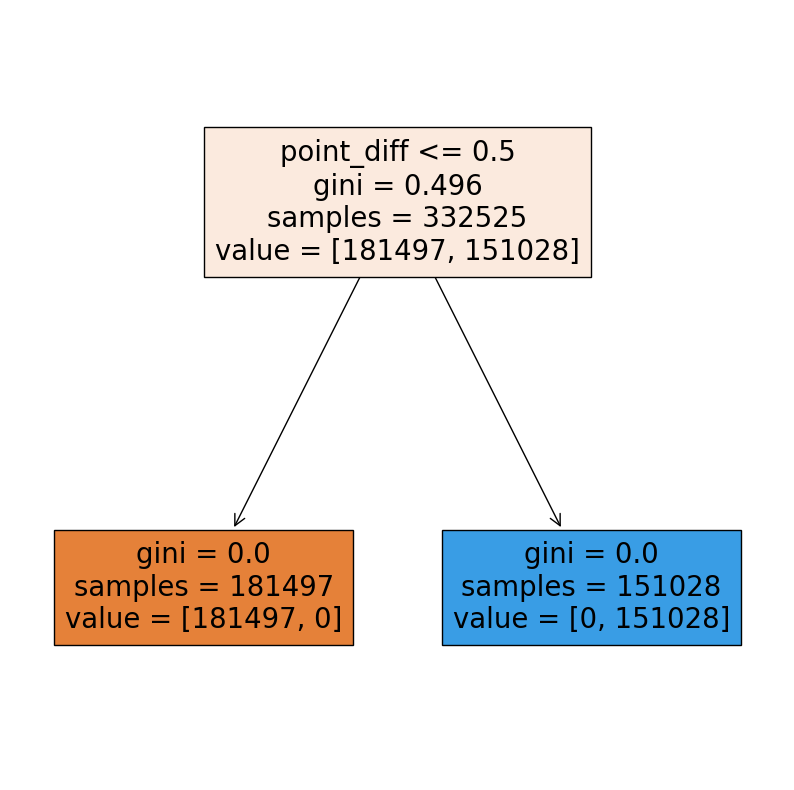

In [121]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()


In this example, we import the plot_tree function from scikit-learn's tree module. We then plot the decision tree by passing in our trained classifier (clf), setting the filled parameter to True to color the nodes based on the majority class, and specifying the feature names using the feature_names parameter. Finally, we use plt.show() to display the plot.